In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings
filterwarnings('ignore')

In [30]:
df=pd.read_csv('Stores.csv')

In [31]:
df.head()

,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales
0,1659,1961,530,66490
1,1461,1752,210,39820
2,1340,1609,720,54010
3,1451,1748,620,53730
4,1770,2111,450,46620


In [32]:
df.tail()

,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales
891,1582,1910,1080,66390
892,1387,1663,850,82080
893,1200,1436,1060,76440
894,1299,1560,770,96610
895,1174,1429,1110,54340


In [33]:
df.max()

Store_Area                2229
Items_Available           2667
Daily_Customer_Count      1560
Store_Sales             116320
dtype: int64

In [34]:
df.min()

Store_Area                775
Items_Available           932
Daily_Customer_Count       10
Store_Sales             14920
dtype: int64

In [35]:
df.shape

(896, 4)

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 896 entries, 0 to 895
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   Store_Area            896 non-null    int64
 1   Items_Available       896 non-null    int64
 2   Daily_Customer_Count  896 non-null    int64
 3   Store_Sales           896 non-null    int64
dtypes: int64(4)
memory usage: 28.1 KB


In [37]:
df.describe()

,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales
count,896.000000,896.000000,896.000000,896.000000
mean,1485.409598,1782.035714,786.350446,59351.305804
std,250.237011,299.872053,265.389281,17190.741895
min,775.000000,932.000000,10.000000,14920.000000
25%,1316.750000,1575.500000,600.000000,46530.000000
50%,1477.000000,1773.500000,780.000000,58605.000000
75%,1653.500000,1982.750000,970.000000,71872.500000
max,2229.000000,2667.000000,1560.000000,116320.000000


In [38]:
missing_values=df.isnull().sum()
missing_values

Store_Area              0
Items_Available         0
Daily_Customer_Count    0
Store_Sales             0
dtype: int64

In [39]:
df.corr()

,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales
Store_Area,1.000000,0.998891,-0.041423,0.097474
Items_Available,0.998891,1.000000,-0.040978,0.098849
Daily_Customer_Count,-0.041423,-0.040978,1.000000,0.008629
Store_Sales,0.097474,0.098849,0.008629,1.000000


<AxesSubplot:>

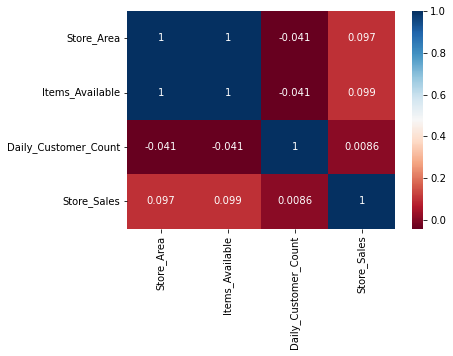

In [40]:
sns.heatmap(df.corr(),cmap='RdBu',annot= True)

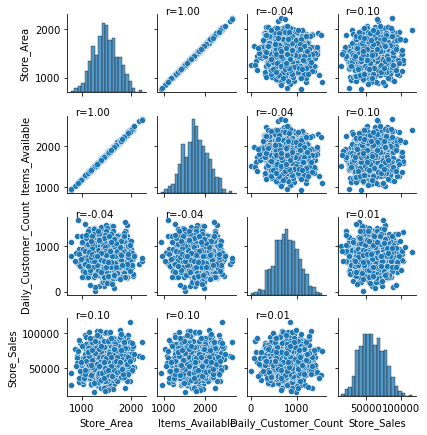

In [41]:
from scipy import stats
def corrfunc(x,y,**kws):
    r, _ = stats.pearsonr(x,y)
    ax= plt.gca()
    ax.annotate('r={:.2f}'.format(r), xy=(0.1,1.0), xycoords=ax.transAxes)
    
plot= sns.pairplot(df,height=1.5)
plot.map_lower(corrfunc)
plot.map_upper(corrfunc)

In [42]:
df.columns

Index(['Store_Area', 'Items_Available', 'Daily_Customer_Count', 'Store_Sales'], dtype='object')

In [43]:
x=df.loc[:,['Store_Area', 'Items_Available', 'Daily_Customer_Count']]

In [44]:
y=df.loc[:,'Store_Sales']

In [45]:
y.shape

(896,)

In [46]:
from sklearn.model_selection import train_test_split

In [47]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 100)

In [48]:
from sklearn.linear_model import LinearRegression

In [49]:
model = LinearRegression()

In [50]:
model.fit(x_train,y_train)

LinearRegression()

In [51]:
y_pred = model.predict(x_test)

In [52]:
from sklearn.metrics import r2_score

In [53]:
r2_score(y_test, y_pred)

0.01538736423624576

In [54]:
import pickle

In [55]:
file = open('StoreSales.pkl','wb')

In [56]:
pickle.dump(model,file)